<a href="https://colab.research.google.com/github/bhanusrinija04/Googlecolab/blob/main/Binary_classification_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences

(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words=10000)

maxlen=200
X_train = pad_sequences(X_train,maxlen=maxlen)
X_test = pad_sequences(X_test,maxlen=maxlen)

In [ ]:
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(maxlen,)))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X_train,y_train,batch_size=32,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5012 - loss: 313.3969 - val_accuracy: 0.5042 - val_loss: 0.7547
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.4976 - loss: 2.9422 - val_accuracy: 0.5010 - val_loss: 0.6945
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.4984 - loss: 1.2696 - val_accuracy: 0.5006 - val_loss: 0.6933
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4999 - loss: 0.9781 - val_accuracy: 0.5007 - val_loss: 0.6931
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5006 - loss: 0.8485 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4962 - loss: 0.7539 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5018 - loss: 0.7328 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.4976 - loss: 0.7125 - val_accuracy: 

In [ ]:
scores=model.evaluate(X_test,y_test,verbose=0)
print("Accuracy: %.2f%%"%(scores[1]*100))
y_pred=(model.predict(X_test)>0.5).astype("int32")

Accuracy: 50.00%
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names=["Negative","Positive"]))

              precision    recall  f1-score   support

    Negative       0.50      1.00      0.67     12500
    Positive       0.47      0.00      0.00     12500

    accuracy                           0.50     25000
   macro avg       0.48      0.50      0.33     25000
weighted avg       0.48      0.50      0.33     25000



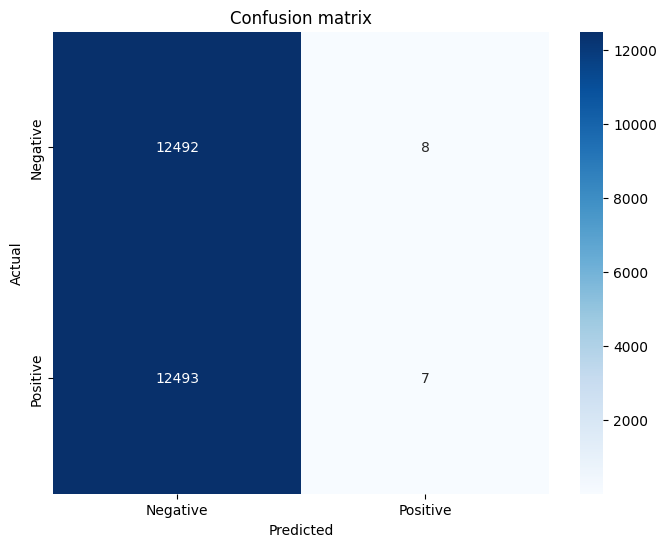

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred)
cm
plt.figure(figsize=(8,6))
sn.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=["Negative","Positive"],yticklabels=["Negative","Positive"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion matrix")
plt.show()